# Analyse der Intervallverteilung

In [2]:
using Revise, Plots, LsqFit, Measurements
includet("run_tools.jl")
using .RunTools

In [3]:
#Definiere Inputpfade
in_path_P6_500 = "Data/messung_500V_P6_2700.txt";

#Definiere Outputpfade
out_path_P6_500_0 = "out/interval/P6_500_0.txt";
out_path_P6_500_1 = "out/interval/P6_500_1.txt";
out_path_P6_500_2 = "out/interval/P6_500_2.txt";

## Extrahiere die Intervallverteilungen

In [4]:
D_t_P6_500 = 0.001;

data_P6_500_0 = run_interval(in_path_P6_500, D_t_P6_500, 1, out_path_P6_500_0);
data_P6_500_1 = run_interval(in_path_P6_500, D_t_P6_500, 2, out_path_P6_500_0);
data_P6_500_2 = run_interval(in_path_P6_500, D_t_P6_500, 3, out_path_P6_500_0);

## Plotte alle Verteilungen in einem Plot

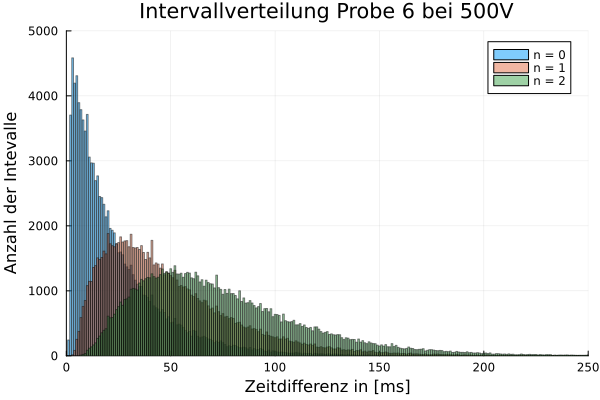

In [5]:

D_ts_0 = data_P6_500_0[:,2] .* (D_t_P6_500 * 1.0e3);
D_ts_1 = data_P6_500_1[:,2] .* (D_t_P6_500 * 1.0e3);
D_ts_2 = data_P6_500_2[:,2] .* (D_t_P6_500 * 1.0e3);

fig_int_dist_all = bar(
    data_P6_500_0[:,1], D_ts_0,
    title="Intervallverteilung Probe 6 bei 500V",
    alpha=0.5,
    label="n = 0",
    xlabel="Zeitdifferenz in [ms]",
    ylabel="Anzahl der Intevalle",
    xlims=(0, 250), ylims=(0, 5000),
);
bar!(data_P6_500_1[:,1], D_ts_1, label="n = 1", alpha=0.5);
bar!(data_P6_500_2[:,1], D_ts_2, label="n = 2", alpha=0.5);

savefig(fig_int_dist_all, "Plots/interval/P6_500_all.png");

display(fig_int_dist_all);

## Untersuche die Vertilung von $n=0$ <br>
$P(t) = Nae^{-at}$  mit $N=aT$, $T$ ist gesamtzeit -> $T = 2700s$

ignore_n = 6 = 6
N = measurement(V_N, D_N) = 116110.0 ± 330.0
a = measurement(V_a, D_a) = 0.04513 ± 0.00022


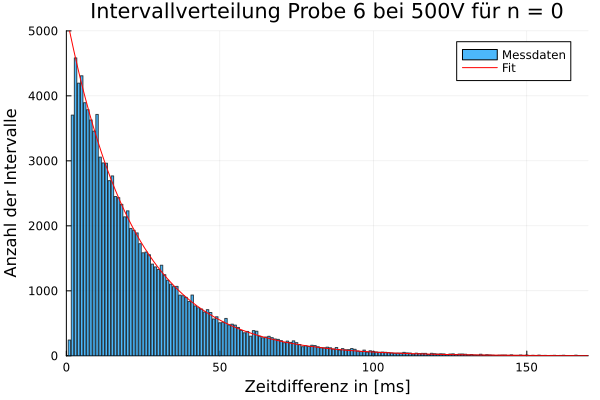

In [6]:
fit_model(t, p) = @. p[1]  * p[2] * exp(-p[2] * t)

p_0 = [100.0,1.0]

@show ignore_n = 6
data_x = data_P6_500_0[ignore_n:end,1]
data_y = D_ts_0[ignore_n:end]

fit = curve_fit(fit_model, data_x, data_y, p_0)

V_N = fit.param[1]
D_N = standard_errors(fit)[1]

V_a = fit.param[2]
D_a = standard_errors(fit)[2]

@show N = measurement(V_N, D_N)
@show a = measurement(V_a, D_a)

fig_int_dist_0 = bar(
    data_P6_500_0[:,1], D_ts_0,
    title = "Intervallverteilung Probe 6 bei 500V für n = 0",
    label ="Messdaten",
    xlabel = "Zeitdifferenz in [ms]",
    ylabel = "Anzahl der Intervalle",
    alpha=0.7,
    xlims = (0, 170),ylims=(0,5000)
)
plot!(t -> fit_model(t, fit.param), label="Fit", color="red")

savefig(fig_int_dist_0, "Plots/interval/P6_500_0.png")

display(fig_int_dist_0)

## Berechnung der Totzeit

In [7]:
function get_counts(path_to_raw_data::String)
    raw_data = read_txt_file(path_to_raw_data)
    counts = size(raw_data)[1]
    return counts/2700.0
end;

a_ = get_counts(in_path_P6_500) * 1.0e-3; #In [ms]

@show tau = 1/a_ - 1/a

tau = 1 / a_ - 1 / a = 2.79 ± 0.11


2.79 ± 0.11